# 图解Word2vec

本文作者：[jalammar](https://twitter.com/jalammar),[作者主页](https://jalammar.github.io/)

翻译：[黄海广](https://github.com/fengdu78)

## 正文开始
我发现嵌入的概念是机器学习中最迷人的想法之一。如果您曾经使用Siri，Google智能助理，Alexa，谷歌翻译，甚至智能手机键盘进行下一词预测，那么您很有可能从这个已经成为自然语言处理模型核心的想法中受益。在过去的几十年中，使用嵌入技术进行神经模型已有相当大的发展（最近的发展包括BERT和GPT2 等尖端模型的语境化嵌入）。

自2013年以来，Word2vec一直是一种有效创建单词嵌入的方法。除了词嵌入字的方法之外，它的一些概念已经被证明可以在非语言任务中有效地创建推荐引擎和理解顺序数据。比如Airbnb，阿里巴巴，Spotify和Anghami这样的公司都从NLP世界中创造出这一优秀的工具并将其用于生产中，从而为新型推荐引擎提供支持。

我们将讨论嵌入的概念，以及使用word2vec生成嵌入的机制。

让我们从一个例子开始，了解使用向量来表示事物。

您是否知道五个数字（向量）的列表可以代表您的个性？

## 个性嵌入：你的个性怎么样？

使用0到100的范围表示你的个性（其中0是最内向的，100是最外向的）。

五大人格特质测试，这些测试会问你一个问题列表，然后在很多方面给你打分，内向/外向就是其中之一。
![](images/1.png)
 
<center>图:测试结果示例。它可以真正告诉你很多关于你自己的事情，并且在学术、个人和职业成功方面都具有预测能力。</center>

假设我的测试得分为38/100。我们可以用这种方式绘制：
![](images/2.png)


让我们将范围切换到从-1到1：
![](images/3.png)

了解一个人，一个维度的信息不够，所以让我们添加另一个维度 - 测试中另一个特征的得分。
![](images/4.png)
 

你可能不知道每个维度代表什么，但仍然可以从一个人的个性的向量表示中获得了很多有用的信息。

我们现在可以说这个向量部分代表了我的个性。当你想要将另外两个人与我进行比较时，这种表示的有用性就出现了。在下图中，两个人中哪一个更像我？
![](images/5.png)

处理向量时，计算相似度得分的常用方法是余弦相似度：
![](images/6.png)
 
一号人物与我的余弦相似度得分高，所以我们的性格比较相似。

然而，两个方面还不足以捕获有关不同人群的足够信息。几十年的心理学研究已经研究了五个主要特征（以及大量的子特征）。所以我们在比较中使用所有五个维度：
![](images/7.png)
 
我们没法在二维上绘制出来五个维度，这是机器学习中的常见挑战，我们经常需要在更高维度的空间中思考。但好处是余弦相似度仍然有效。它适用于任意数量的维度：
![](images/8.png)
 
嵌入的两个中心思想：

- 我们可以将人（事物）表示为数字的向量。
- 我们可以很容易地计算出相似的向量彼此之间的关系。
![](images/9.png)

## 词嵌入

我们导入在维基百科上训练的GloVe向量

In [1]:
import gensim
import gensim.downloader as api
model = api.load('glove-wiki-gigaword-50')

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


单词“king”的词嵌入表示：

In [2]:
model["king"]

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

查看“king”最相似的单词

In [3]:
model.most_similar("king")

[('prince', 0.8236179351806641),
 ('queen', 0.7839042544364929),
 ('ii', 0.7746230363845825),
 ('emperor', 0.7736247181892395),
 ('son', 0.766719400882721),
 ('uncle', 0.7627150416374207),
 ('kingdom', 0.7542160749435425),
 ('throne', 0.7539913654327393),
 ('brother', 0.7492411136627197),
 ('ruler', 0.7434253096580505)]

这是一个包含50个数字的列表，我们无法说清楚里面的值代表什么。我们把所有这些数字放在一行，以便我们可以比较其他单词向量。让我们根据它们的值对单元格进行颜色编码（如果它们接近2则为红色，如果它们接近0则为白色，如果它们接近-2则为蓝色）

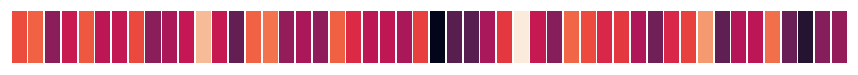

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 1))
sns.heatmap([model["king"]],
            xticklabels=False,
            yticklabels=False,
            cbar=False,
            vmin=-2,
            vmax=2,
            linewidths=0.7)
plt.show()

我们将忽略数字并仅查看颜色以指示单元格的值，我们将“King”与其他词语进行对比：

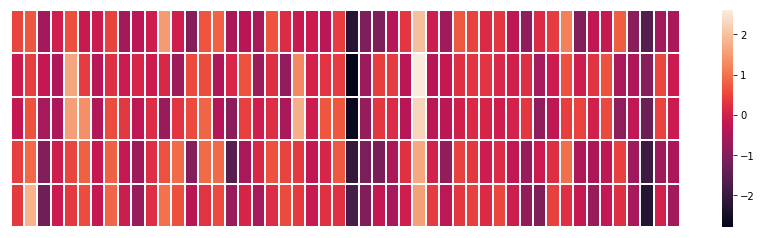

In [8]:
plt.figure(figsize=(15, 4))
sns.heatmap([
    model["king"],
    model["man"],
    model["woman"],
    model["king"] - model["man"] + model["woman"],
    model["queen"],
],
            cbar=True,
            xticklabels=False,
            yticklabels=False,
            linewidths=1)
plt.show()

看看“man”和“woman”是如何彼此更相似的，他们中的任何一个都是“king”？这告诉你一些事情。这些向量表示捕获了这些单词的信息/含义/关联。

这是另一个示例列表（通过垂直扫描列来查找具有相似颜色的列）：
![](images/10.png)

有几点需要指出：

- 所有这些不同的单词都有一个直的红色列。它们在这个维度上是相似的（我们不知道每个维度代码是什么）
- 你可以看到“woman”和“girl”在很多地方是如何相似的。与“man”和“boy”一样
- “boy”和“girl”也有彼此相似的地方，但与“woman”或“man”不同。这些是否可以编写一个模糊的青年概念？可能。
- 除了最后一个字之外的所有字都代表着人。我添加了一个对象“water”来显示类别之间的差异。例如，您可以看到蓝色列一直向下并在嵌入“water”之前停止。
- 有一个明显的地方，“king”和“queen”彼此相似，并与所有其他人不同。

## 类比

我们可以添加和减去单词嵌入并获得有趣的结果，最有名的例子是公式： “king” - “man” + “woman”:

In [9]:
model.most_similar(positive=["king","woman"],negative=["man"])

[('queen', 0.8523603677749634),
 ('throne', 0.7664334177970886),
 ('prince', 0.759214460849762),
 ('daughter', 0.7473883032798767),
 ('elizabeth', 0.7460220456123352),
 ('princess', 0.7424569725990295),
 ('kingdom', 0.7337411642074585),
 ('monarch', 0.7214490175247192),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099430561065674)]

我们可以像以前一样想象这个类比：
![](images/11.png)

## 语言建模


如果想要给出NLP应用程序的示例，最好的示例之一将是智能手机键盘的下一个字（词）预测功能。这是数十亿人每天使用数百次的功能。
![](images/12.png)
  
下一个字（词）预测是一项可以通过语言模型解决的任务。语言模型可以采用单词列表（比方说两个单词），并尝试预测它们之后的单词。

在上面的屏幕截图中，我们可以将模型视为接受这两个绿色单词（thou shalt）并返回建议列表（“not”是具有最高概率的那个字）的模型：
 ![](images/13.png)
  

我们可以把模型想象成这个黑盒子：

 ![](images/14.png)
  

但实际上，该模型不会只输出一个单词。它实际上输出了它所知道的所有单词的概率分数（模型的“词汇表”，其范围可以从几千到一百多万个字（词））。然后应用程序必须找到分数最高的单词，并将其呈现给用户。

 ![](images/15.png)
图：神经语言模型的输出是模型知道的所有单词的概率分数。我们在这里将概率称为百分比，比如概率40％将在输出向量中表示为0.4。

经过训练，早期的神经语言模型（[Bengio 2003](http://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)）将分三步计算预测：

   ![](images/16.png)
 

在讨论嵌入时，第一步对我们来说最相关。训练过程的结果之一是这个矩阵包含我们词汇表中每个单词的嵌入。在预测时间内，我们只查找输入字的嵌入，并使用它们来计算预测：
   ![](images/17.png)
 
现在让我们转到训练过程，以了解嵌入矩阵是如何工作的。

## 语言模型的训练

与大多数其他机器学习模型相比，语言模型具有巨大优势。即：我们所有的书籍，文章，维基百科内容和其他形式的大量文本数据可以作为训练数据。与此相比，许多其他机器学习模型需要手动设计特征和专门收集的数据。


单词通过我们查看它们往往会出现在旁边的其他单词来嵌入。其机制就是这样
1.	我们获得了大量文本数据（例如，所有维基百科文章）。然后
2.	我们有一个窗口（比如说三个单词），我们会对所有文本进行滑动。
3.	滑动窗口为我们的模型生成训练样本

![](images/wikipedia-sliding-window.png)
 
当这个窗口滑动文本时，我们（虚拟地）生成一个用于训练模型的数据集。为了准确看看它是如何完成的，让我们看看滑动窗口如何处理这个短语：

当我们开始时，窗口在句子的前三个单词上：
![](images/lm-sliding-window.png)


我们将前两个单词作为特征，将第三个单词作为标签：

![](images/lm-sliding-window-2.png)


我们现在已经在数据集中生成了第一个样本，我们稍后可以使用它来训练语言模型。

然后我们将窗口滑动到下一个位置并创建第二个样本：
![](images/lm-sliding-window-3.png)
 
现在生成第二个示例。

很快我们就会有一个更大的数据集，在不同的单词对之后，这些数据集会出现：
![](images/lm-sliding-window-4.png)
 

在实践中，模型往往在我们滑动窗口时进行训练。但我发现逻辑上将“数据集生成”阶段与训练阶段分开是更清楚的。除了基于神经网络的语言建模方法之外，一种称为N-gram的技术通常用于训练语言模型。

要了解这种从N-gram到神经模型的转换如何反映现实世界的产品，建议看这篇[2015年博客文章](https://blog.swiftkey.com/neural-networks-a-meaningful-leap-for-mobile-typing/)，介绍他们的神经语言模型并将其与之前的N-gram模型进行比较。

## 两边看

给了你句子前面的内容，进行填空：
 ![](images/jay_was_hit_by_a_.png) 
我在这里给你的背景是空格之前的五个字（以及之前提到的“bus”）。我相信大多数人都会猜到空格里的这个词会是“bus”。但是，如果我再给你一条信息:空格之后的一句话，那会改变你的答案吗？
 ![](images/jay_was_hit_by_a_bus.png)  
这完全改变了应该留在空格中的内容。“red”这个词现在最可能填到空格中。我们从中学到的是特定词语之前和之后的词语都具有信息价值。事实证明，考虑两个方向（我们猜测的单词左侧和右侧的单词）会让词嵌入做得更好。

让我们看看我们如何调整我们训练模型的方式来解决这个问题。

## Skipgram

我们不仅可以查看在目标词之前的两个单词，还可以查看其后的两个单词。
 ![](images/continuous-bag-of-words-example.png) 
如果我们这样做，我们实际构建和训练模型的数据集将如下所示：
![](images/continuous-bag-of-words-dataset.png)
  
这被称为连续词袋结构，并在word2vec论文 [one of the word2vec papers ](https://arxiv.org/pdf/1301.3781.pdf)中进行过描述。

另一种结构与连续词袋结构略有不同，但也可以也显示出良好结果。这个结构试图使用当前词来猜测相邻词，而不是根据其上下文（它之前和之后的词）猜测一个词。我们可以想到它在训练文本上滑动的窗口如下所示：
 ![](images/skipgram-sliding-window.png) 
<center>图：绿色框中的字将是输入字，每个粉色框将是可能的输出。</center>

粉色框具有不同的阴影，因为此滑动窗口实际上在我们的训练数据集中创建了四个单独的样本：
![](images/skipgram-sliding-window-samples.png)
  

此方法称为skipgram架构。我们可以执行以下操作将滑动窗口可视化：

 ![](images/skipgram-sliding-window-1.png)

这会将这四个样本添加到我们的训练数据集中：
![](images/skipgram-sliding-window-2.png)
 
然后我们将窗口滑动到下一个位置：
![](images/skipgram-sliding-window-3.png)
 

这将产生我们的下四个样本：
![](images/skipgram-sliding-window-4.png)
 
接着滑动几个位置之后，我们有更多的样本：
![](images/skipgram-sliding-window-5.png)
 

## 重新审视训练过程

现在我们已经从现有的运行文本中提取了我们的skipgram训练数据集，让我们看看我们如何使用它来训练预测相邻单词的基本神经语言模型。
![](images/skipgram-language-model-training.png)
 
我们从数据集中的第一个样本开始。我们把特征提供给未经训练的模型，要求它预测一个合适的相邻单词。
![](images/skipgram-language-model-training-2.png)
 
该模型进行三个步骤并输出预测向量（概率分配给其词汇表中的每个单词）。由于该模型未经过训练，因此在此阶段的预测肯定是错误的。但那没关系。我们知道应该它将猜到哪个词：我们目前用于训练模型的行中的标签/输出单元格：
![](images/skipgram-language-model-training-3.png)
 
<center>图：“目标向量”的词（字）概率为1，其他词（字）的概率都是0。</center>

我们减去两个向量，得到一个误差向量：

 ![](images/skipgram-language-model-training-4.png)

现在可以使用此误差向量来更新模型，以便下次当“not”作为输入时，模型更有可能猜测“thou”。
 ![](images/skipgram-language-model-training-5.png)
 

这就是训练的第一步。我们继续使用数据集中的下一个样本进行相同的处理，然后是下一个样本，直到我们覆盖了数据集中的所有样本。这就结束了一个epcho的训练。我们继续训练多个epcho，然后我们就有了训练好的模型，我们可以从中提取嵌入矩阵并将其用于任何其他应用。

虽然这加深了我们对该过程的理解，但仍然不是word2vec实际上的训练过程。

## 负采样

回想一下这个神经语言模型如何计算其预测的三个步骤： 
  ![](images/language-model-expensive.png)

从计算的角度来看，第三步非常消耗资源：尤其是我们将在数据集中为每个训练样本做一次（很可能数千万次）。我们需要做一些事情来提高效率。

一种方法是将目标分成两个步骤：
1.	生成高质量的单词嵌入（不要担心下一个单词预测）。
2.	使用这些高质量的嵌入来训练语言模型（进行下一个单词预测）。

我们将专注于第1步，因为我们专注于嵌入。要使用高性能模型生成高质量嵌入，我们可以从预测相邻单词切换模型的任务：
 ![](images/predict-neighboring-word.png)  
并将其切换到一个取输入和输出字的模型，并输出一个分数，表明它们是否是邻居（0表示“不是邻居”，1表示“邻居”）。
  ![](images/are-the-words-neighbors.png) 
 
这个简单的改变，将我们需要的模型从神经网络改为逻辑回归模型：因此它变得更简单，计算速度更快。

这个改变要求我们切换数据集的结构 - 标签现在是一个值为0或1的新列。它们将全部为1，因为我们添加的所有单词都是邻居。
  ![](images/word2vec-training-dataset.png) 
 

现在可以以极快的速度计算 - 在几分钟内处理数百万个示例。但是我们需要关闭一个漏洞。如果我们所有的例子都是正面的（目标：1），我们打开自己的智能模型的可能性总是返回1 - 达到100％的准确性，但什么都不学习并生成垃圾嵌入。
   ![](images/word2vec-smartass-model.png)
   
为了解决这个问题，我们需要在数据集中引入负样本 - 不是邻居的单词样本。我们的模型需要为这些样本返回0。现在这是一个挑战，模型必须努力解决，而且速度还要快。

![](images/word2vec-negative-sampling.png)

<center>图：对于我们数据集中的每个样本，我们添加了负样本。它们具有相同的输入词和0标签。</center>

但是我们填写什么作为输出词？我们从词汇表中随机抽取单词
![](images/word2vec-negative-sampling-2.png)
 
这个想法的灵感来自[Noise-contrastive estimation](http://proceedings.mlr.press/v9/gutmann10a/gutmann10a.pdf)。我们将实际信号（相邻单词的正例）与噪声（随机选择的不是邻居的单词）进行对比。这是计算量和统计效率的巨大折衷。

## 带负采样的skipgram（SGNS）
我们现在已经介绍了word2vec中的两个核心思想：

负采样和skipgram。
![](images/skipgram-with-negative-sampling.png)

## Word2vec训练流程

现在我们已经建立了skipgram和负采样的两个中心思想，我们可以继续仔细研究实际的word2vec训练过程。

在训练过程开始之前，我们预先处理我们正在训练模型的文本。在这一步中，我们确定词汇量的大小（我们称之为`vocab_size`，比如说，将其视为10,000）以及哪些词属于它。
在训练阶段的开始，我们创建两个矩阵 - `Embedding`矩阵和`Context`矩阵。这两个矩阵在我们的词汇表中嵌入了每个单词（这`vocab_size`是他们的维度之一）。
第二个维度是我们希望每次嵌入的时间长度（`embedding_size`- 300是一个常见值，但我们在本文前面的例子是50。）。
 ![](images/word2vec-embedding-context-matrix.png) 
 
在训练过程开始时，我们用随机值初始化这些矩阵。然后我们开始训练过程。在每个训练步骤中，我们采取一个正样本及其相关的负样本。我们来看看我们的第一组：
 ![](images/word2vec-training-example.png) 
现在我们有四个单词：输入单词`not`和输出/上下文单词:( `thou`实际邻居）,`aaron`，和`taco`（负样本）。我们继续查找它们的嵌入 - 对于输入词，我们查看`Embedding`矩阵。对于上下文单词，我们查看`Context`矩阵（即使两个矩阵都在我们的词汇表中嵌入了每个单词）。
 ![](images/word2vec-lookup-embeddings.png)
 
然后，我们计算输入嵌入与每个上下文嵌入的点积。。在每种情况下，会产生一个数字，该数字表示输入和上下文嵌入的相似性。
 ![](images/word2vec-training-dot-product.png)
  
现在我们需要一种方法将这些分数转化为看起来像概率的东西 ：使用sigmoid函数把概率转换为0和1。
 ![](images/word2vec-training-dot-product-sigmoid.png)
  
现在我们可以将sigmoid操作的输出视为这些样本的模型输出。您可以看到`taco`得分最高`aaron`，并且在sigmoid操作之前和之后仍然具有最低分。
既然未经训练的模型已做出预测，并且看到我们有一个实际的目标标签要比较，那么让我们计算模型预测中的误差。为此，我们只从目标标签中减去sigmoid分数。
 ![](images/word2vec-training-error.png)
<center>图：$error= target-sigmoid_scores$</center>

这是“机器学习”的“学习”部分。现在，我们可以利用这个错误分数调整`not`，`thou`，`aaron`和`taco`的嵌入,使下一次我们做出这一计算，结果会更接近目标分数。
  ![](images/word2vec-training-update.png)
训练步骤到此结束。我们从这一步骤中得到稍微好一点的嵌入（`not`，`thou`，`aaron`和`taco`）。我们现在进行下一步（下一个正样本及其相关的负样本）,并再次执行相同的过程。
   ![](images/word2vec-training-example-2.png)
当我们循环遍历整个数据集多次时，嵌入继续得到改进。然后我们可以停止训练过程，丢弃`Context`矩阵，并使用`Embeddings`矩阵作为下一个任务的预训练嵌入。

## 窗口大小和负样本数量
word2vec训练过程中的两个关键超参数是窗口大小和负样本的数量。
![](images/word2vec-window-size.png)

不同的窗口大小可以更好地提供不同的任务。

一种启发式方法是较小的窗口嵌入（2-15），其中两个嵌入之间的高相似性得分表明这些单词是可互换的（注意，如果我们只查看周围的单词，反义词通常可以互换 - 例如，好的和坏的经常出现在类似的情境中）。

使用较大的窗口嵌入（15-50，甚至更多）会得到相似性更能指示单词相关性的嵌入。实际上，您通常需要对嵌入过程提供注释指导，为您的任务带来有用的相似感。

Gensim默认窗口大小为5（输入字本身加上输入字之前的两个字和输入字之后的两个字）。
![](images/word2vec-negative-samples.png)
负样本的数量是训练过程的另一个因素。原始论文里负样本数量为5-20。它还指出，当你拥有足够大的数据集时，2-5似乎已经足够了。Gensim默认为5个负样本。
## 结论

我希望你现在对词嵌入和word2vec算法有所了解。我也希望现在当你读到一篇提到“skip gram with negative sampling”（SGNS）的论文时，你会对这些概念有了更好的认识。

本文作者：[jalammar](https://twitter.com/jalammar)。

## 参考文献和进一步阅读材料
-   [Distributed Representations of Words and Phrases and their Compositionality](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf) [pdf]

-   [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf) [pdf]

-   [A Neural Probabilistic Language Model](http://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf) [pdf]

-   [Speech and Language Processing](https://web.stanford.edu/~jurafsky/slp3/) by Dan Jurafsky and James H. Martin is a leading resource for NLP. Word2vec is tackled in Chapter 6.

-   [Neural Network Methods in Natural Language Processing](https://www.amazon.com/Language-Processing-Synthesis-Lectures-Technologies/dp/1627052984) by [Yoav Goldberg](https://twitter.com/yoavgo) is a great read for neural NLP topics.

-   [Chris McCormick](http://mccormickml.com/) has written some great blog posts about Word2vec. He also just released [The Inner Workings of
    word2vec](https://www.preview.nearist.ai/paid-ebook-and-tutorial), an E-book focused on the internals of word2vec.

-   Want to read the code? Here are two options:

    -   Gensim’s [python implementation](https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/models/word2vec.py) of
        word2vec

    -   Mikolov’s original [implementation in C](https://github.com/tmikolov/word2vec/blob/master/word2vec.c) – better
        yet, this [version with detailed
        comments](https://github.com/chrisjmccormick/word2vec_commented/blob/master/word2vec.c) from
        Chris McCormick.

-   [Evaluating distributional models of compositional semantics](http://sro.sussex.ac.uk/id/eprint/61062/1/Batchkarov,%20Miroslav%20Manov.pdf)

-   [On word embeddings](http://ruder.io/word-embeddings-1/index.html), [part 2](http://ruder.io/word-embeddings-softmax/)

-   [Dune](https://www.amazon.com/Dune-Frank-Herbert/dp/0441172717/)
